In [1]:
from faker import Faker 
import random
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import csv
from faker_credit_score import CreditScore

## Import Library

In [ ]:
from faker import Faker 
import random
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import csv
from faker_credit_score import CreditScore

### EXPLORATION DATA ANALYSIS (DESCRIPTIVE STATISTICS)

In [2]:
# Read CSV file

df = pd.read_excel("C:/Users/Lenovo/Downloads/dataini.xlsx")
df.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,competitor_name,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score,credit_score_category
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,10-15 years,high,sedang,sangat kuat,sangat mudah,cukup mudah,...,CV Hasanah,harga lebih murah,agresif,diragukan,lancar,tidak lancar,dalam perhatian khusus,lancar,43,Fair
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,> 15 years,high,sangat mudah,cukup kuat,cukup sulit,cukup sulit,...,CV Yuniar,kualitas produk lebih baik,inovatif,tidak lancar,diragukan,lancar,dalam perhatian khusus,tidak lancar,58,Good
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,> 15 years,high,sulit,cukup kuat,sangat mudah,cukup sulit,...,PT Mahendra,jangkauan pasar yang luas,konservatif,diragukan,tidak lancar,lancar,diragukan,tidak lancar,67,Good
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,5-10 years,high,cukup mudah,tidak kuat,cukup mudah,sulit,...,CV Hasanah Marpaung,brand recognition yang kuat,konservatif,diragukan,tidak lancar,macet,lancar,lancar,48,Fair
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,> 15 years,medium,sulit,tidak kuat,sedang,cukup sulit,...,CV Nasyiah,kualitas produk lebih baik,konservatif,macet,dalam perhatian khusus,lancar,lancar,dalam perhatian khusus,14,Poor


In [3]:
df.shape

(100, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   NIB                                   100 non-null    int64 
 1   business_name                         100 non-null    object
 2   business_specific_code                100 non-null    int64 
 3   business_specific                     100 non-null    object
 4   business_age                          100 non-null    object
 5   business_prospect                     100 non-null    object
 6   easy_become_distributor               100 non-null    object
 7   brand_recognition                     100 non-null    object
 8   easy_agent_permit_management          100 non-null    object
 9   easy_access_to_scarce_raw_materials   100 non-null    object
 10  product_quality                       100 non-null    object
 11  company_reputation               

In [5]:
df.describe()

,NIB,business_specific_code,total_labor,many_similar_competitors,credit_score
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,4.838938e+13,37569.260000,579.130000,5.680000,49.580000
std,2.892370e+13,26143.462224,273.053909,3.008003,31.170492
min,1.684713e+12,1114.000000,10.000000,1.000000,0.000000
25%,2.293434e+13,10962.750000,344.000000,3.000000,23.750000
50%,4.594149e+13,43110.000000,639.500000,5.500000,54.000000
75%,7.476060e+13,50719.500000,820.250000,8.000000,73.500000
max,9.652661e+13,93292.000000,987.000000,10.000000,100.000000


In [6]:
# melihat statistik deskriptif (sebelum data preparation) untuk kolom dengan tipe data object
df.describe(include='object')

,business_name,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,product_quality,company_reputation,...,age_range_labor,competitor_name,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score_category
count,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
unique,100,99,4,3,5,4,5,5,4,4,...,3,99,4,4,5,5,5,5,5,5
top,UD Irawan,Pembangkitan Tenaga Listrik,10-15 years,high,cukup mudah,cukup kuat,cukup mudah,cukup sulit,cukup baik,cukup baik,...,> 45,UD Latupono,kualitas produk lebih baik,inovatif,lancar,dalam perhatian khusus,lancar,lancar,tidak lancar,Poor
freq,1,2,27,35,27,30,28,34,29,30,...,40,2,31,26,25,26,22,25,25,36


In [7]:
### Exploratory Data Analysis: Univariate Analysis

In [8]:
df.columns

Index(['NIB', 'business_name', 'business_specific_code', 'business_specific',
       'business_age', 'business_prospect', 'easy_become_distributor',
       'brand_recognition', 'easy_agent_permit_management',
       'easy_access_to_scarce_raw_materials', 'product_quality',
       'company_reputation', 'relationship_with_business_partners',
       'compliance_with_business_lincece', 'status_business_lincece',
       'customer_location', 'degree_of_dependency_on_the_customer',
       'age_range', 'total_labor', 'age_range_labor',
       'many_similar_competitors', 'competitor_name', 'competitor_advantage',
       'competitor_behavior', 'other_credit_history1', 'other_credit_history2',
       'other_credit_history3', 'last_credit_history',
       'worst_perfomance_history', 'credit_score', 'credit_score_category'],
      dtype='object')

In [9]:
len(df.columns)

31

In [10]:
df.isnull().sum()

NIB                                     0
business_name                           0
business_specific_code                  0
business_specific                       0
business_age                            0
business_prospect                       0
easy_become_distributor                 0
brand_recognition                       0
easy_agent_permit_management            0
easy_access_to_scarce_raw_materials     0
product_quality                         0
company_reputation                      0
relationship_with_business_partners     0
compliance_with_business_lincece        0
status_business_lincece                 0
customer_location                       0
degree_of_dependency_on_the_customer    0
age_range                               0
total_labor                             0
age_range_labor                         0
many_similar_competitors                0
competitor_name                         0
competitor_advantage                    0
competitor_behavior               

In [11]:
numerical_cols = ["NIB", "business_specific_code","total_labor", "many_similar_competitors", "credit_score"]
categorical_cols = ["business_age", "business_prospect", "easy_become_distributor", "brand_recognition", "easy_agent_permit_management", "easy_access_to_scarce_raw_materials", "product_quality", "company_reputation", "relationship_with_business_partners", "compliance_with_business_lincece", "status_business_lincece", "customer_location", "degree_of_dependency_on_the_customer", "age_range", "age_range_labor", "competitor_advantage", "competitor_behavior", "other_credit_history1", "other_credit_history2", "other_credit_history3", "last_credit_history", "worst_perfomance_history", "credit_score_category"]
target_cols = "credit_score"

### EXPLORATION DATA ANALYSIS (UNIVARIATE ANALYSIS)

#### Categorical Data

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


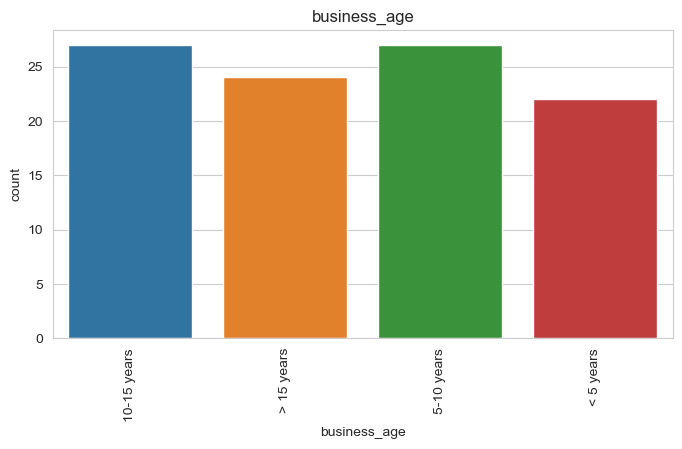

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


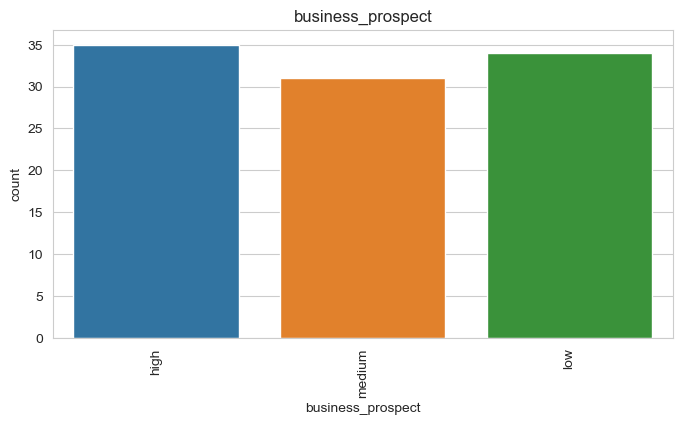

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


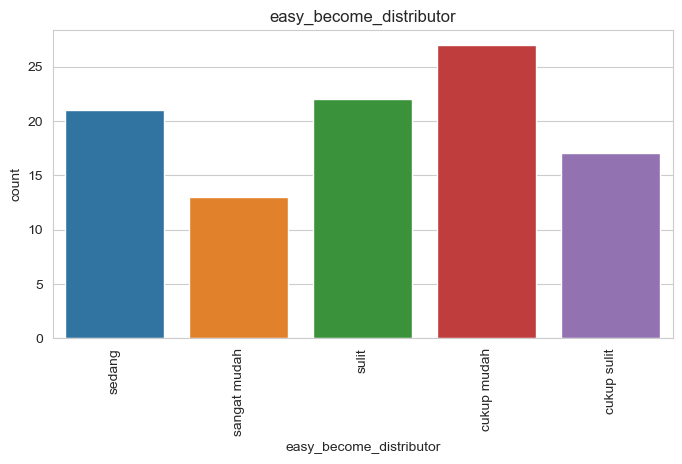

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


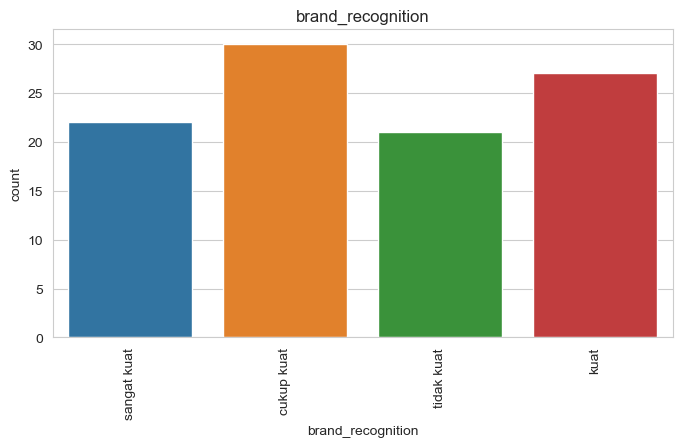

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


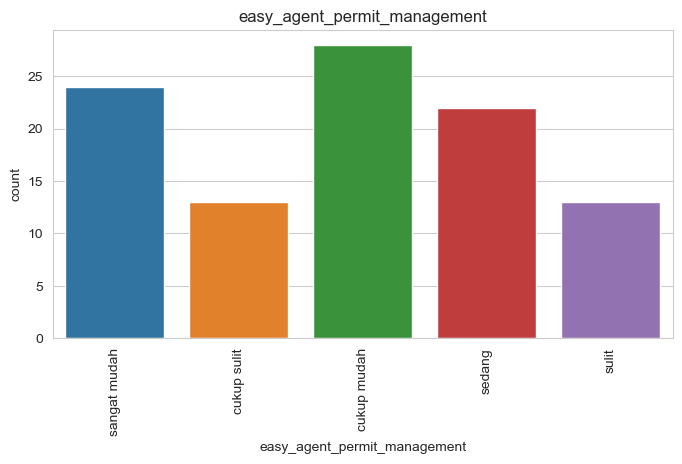

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


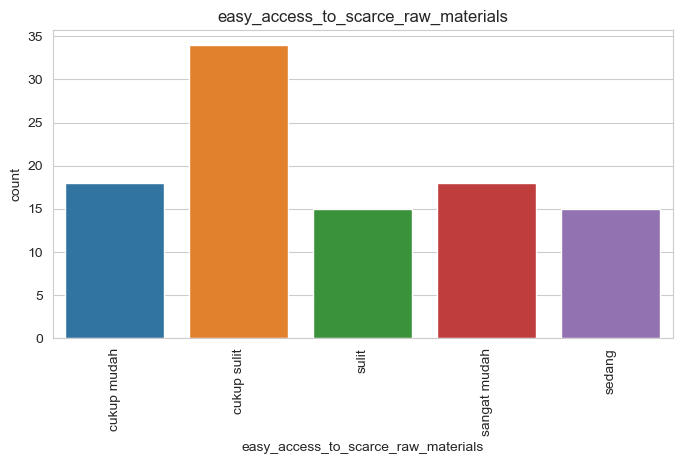

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


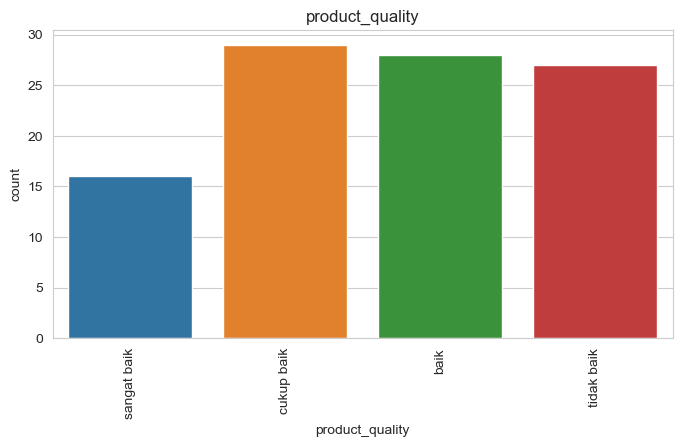

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


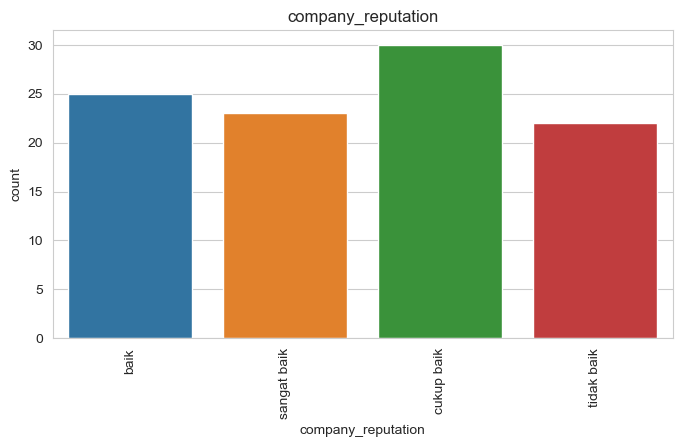

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


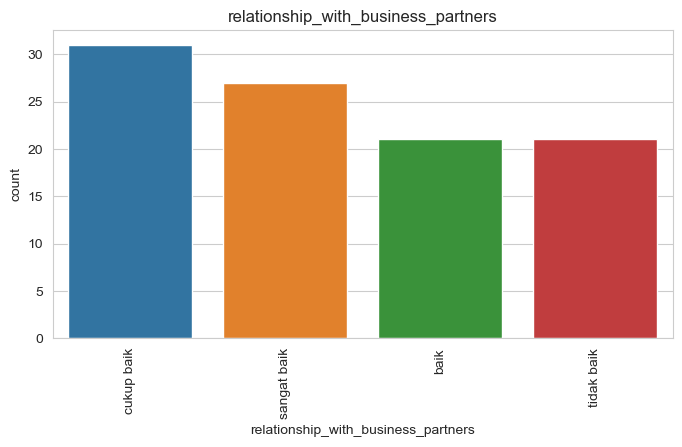

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


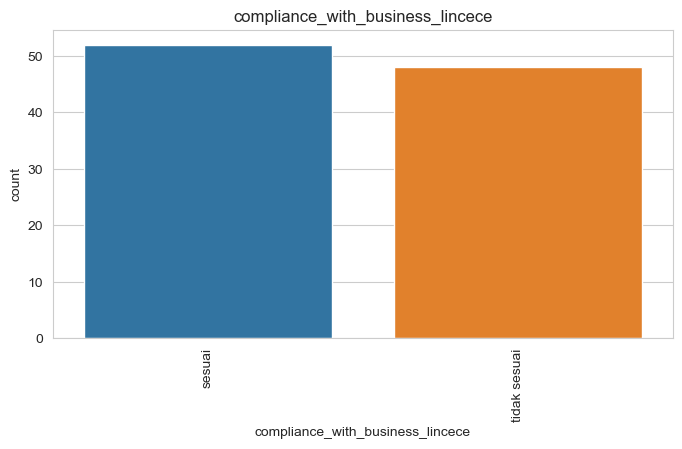

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


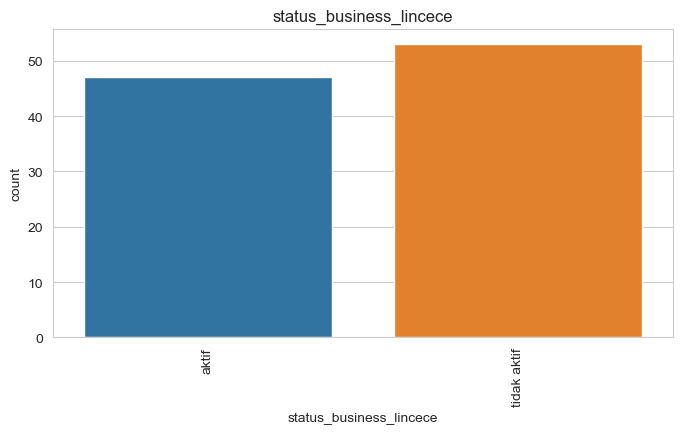

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


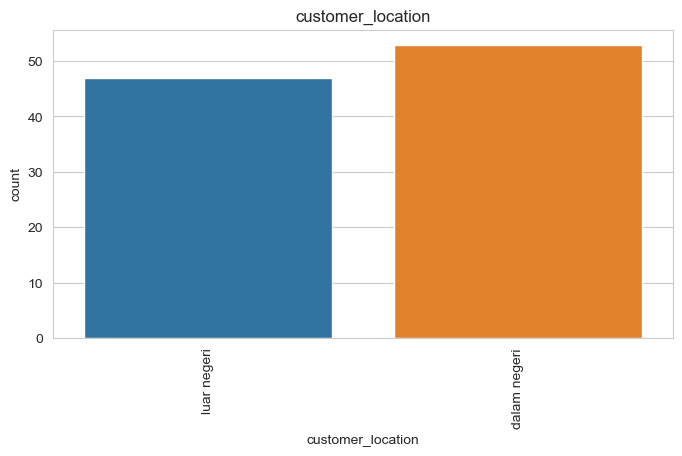

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


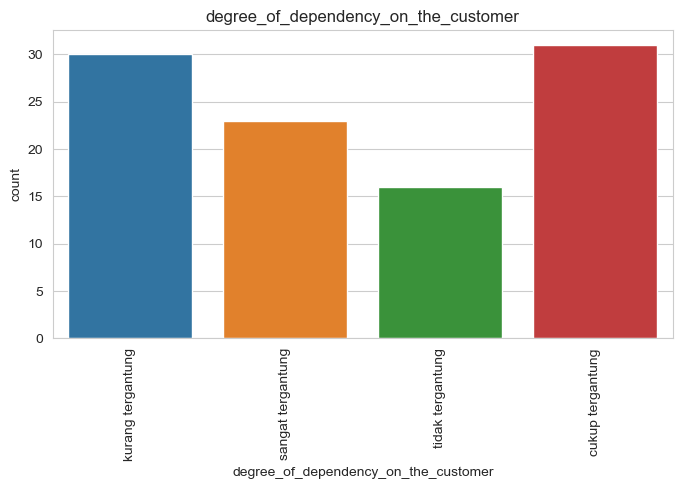

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


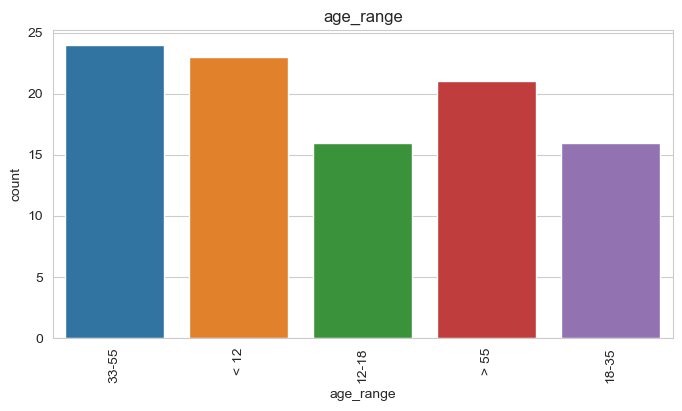

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


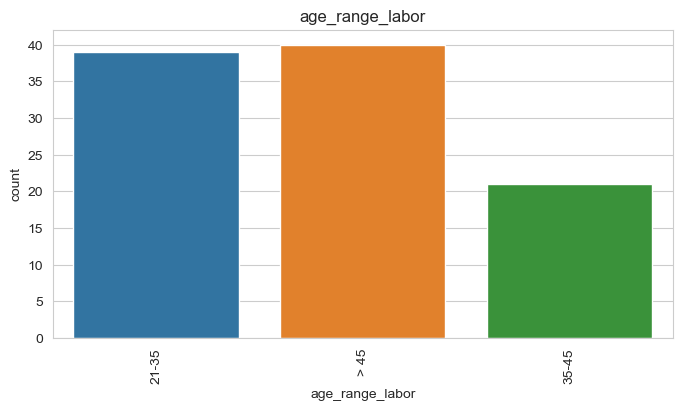

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


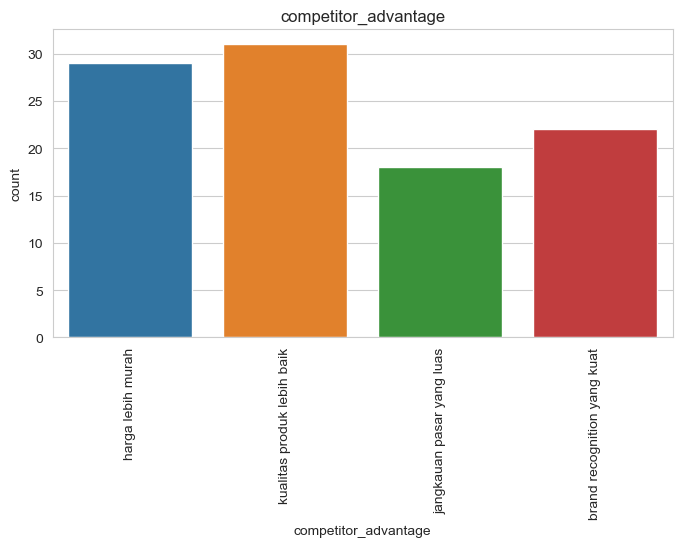

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


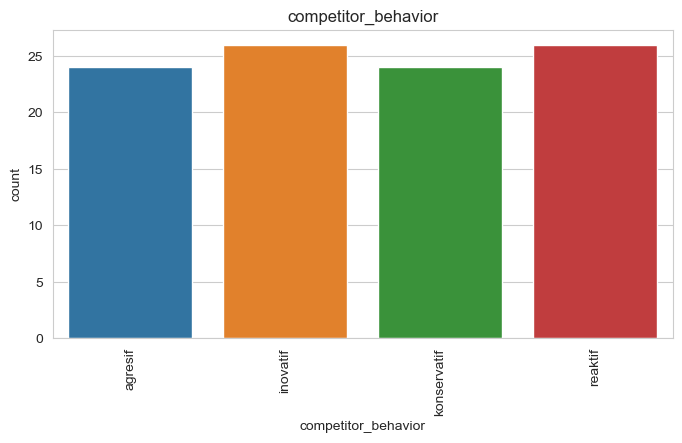

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


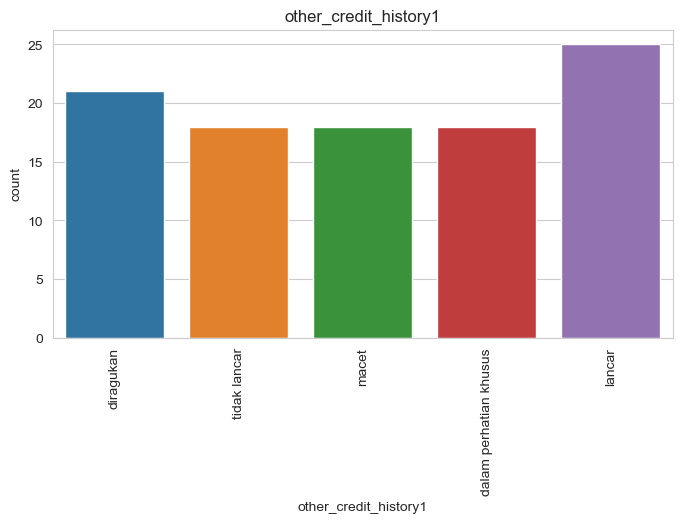

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


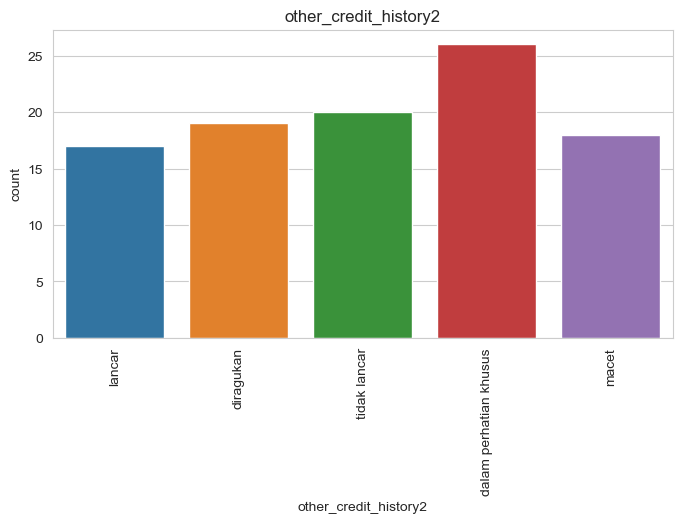

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


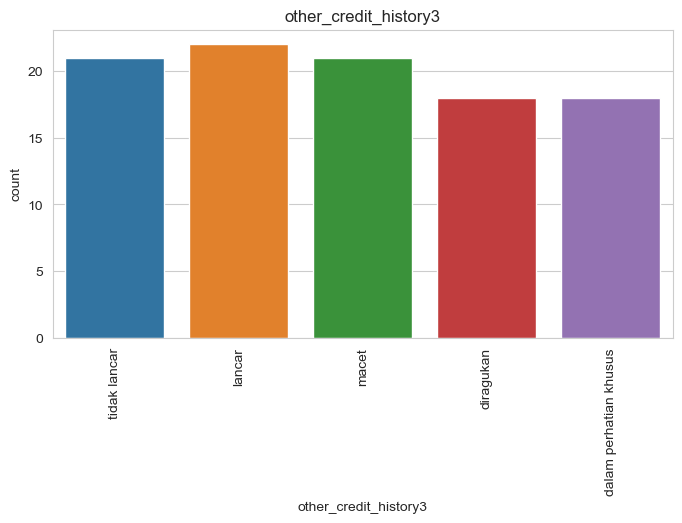

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


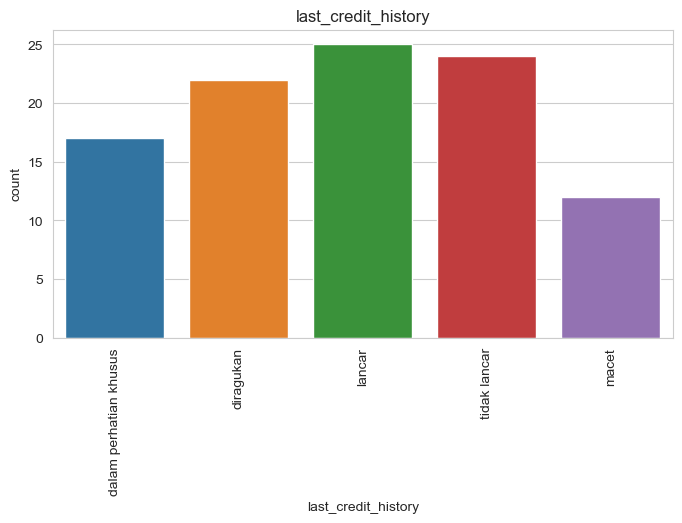

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


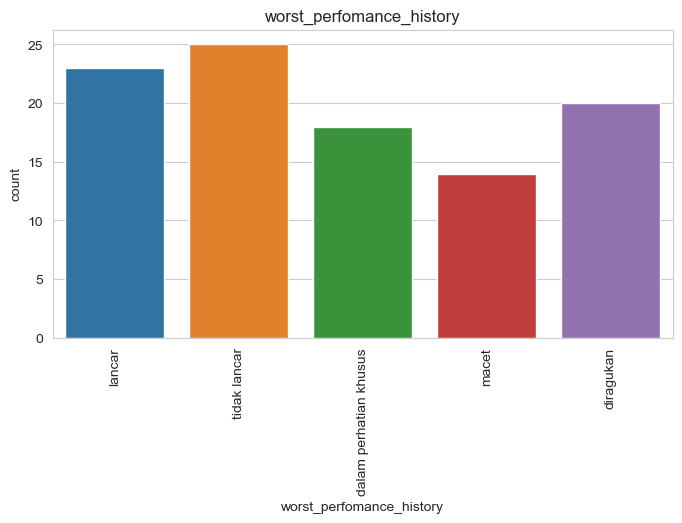

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


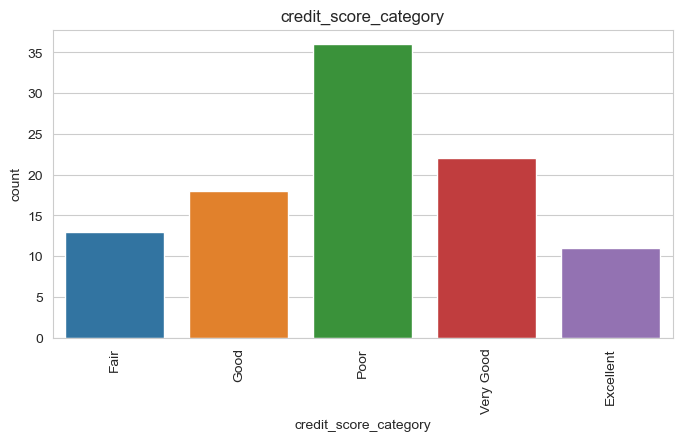

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.set_style('whitegrid')
    plt.title(col)
    sns.countplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

#### Numerical Data

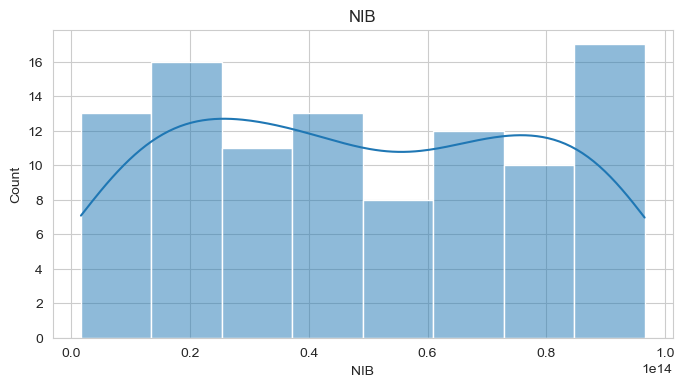

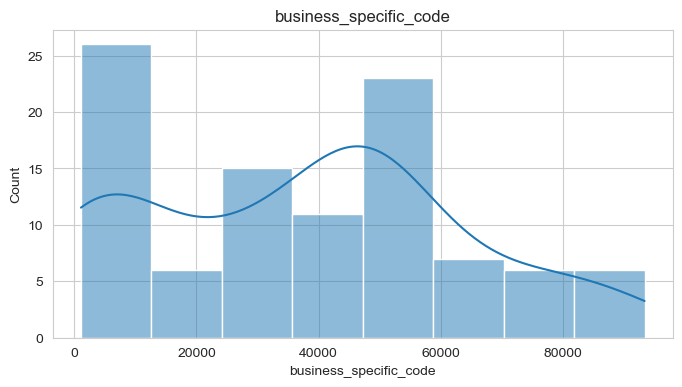

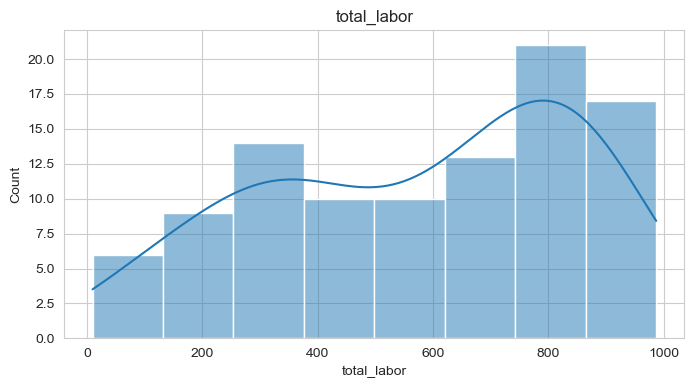

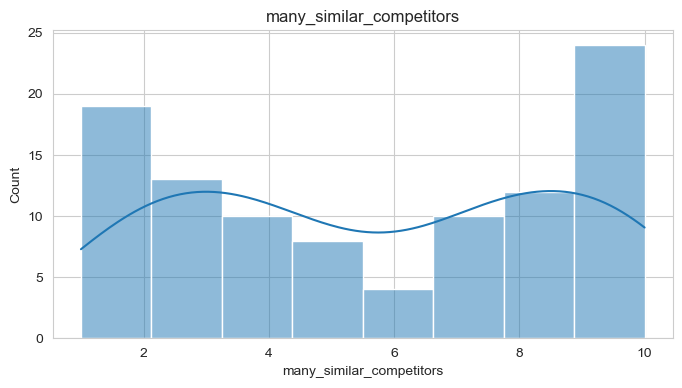

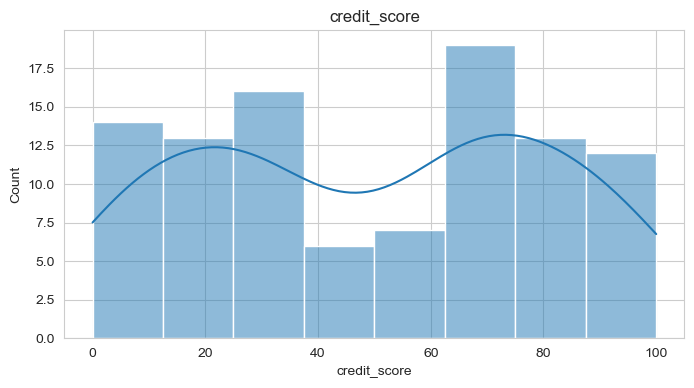

In [13]:
# histogram
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.set_style('whitegrid')
    plt.title(col)
    sns.histplot(df[col], kde=True)
    plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


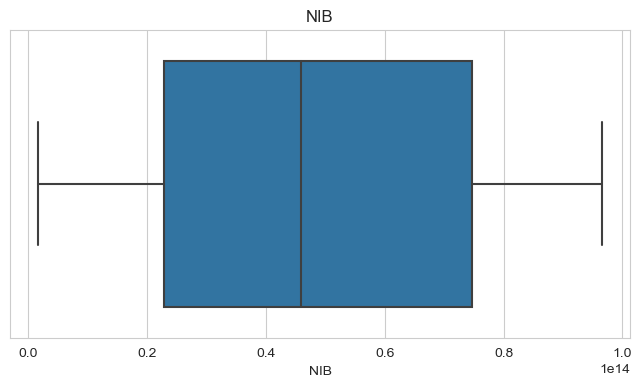

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


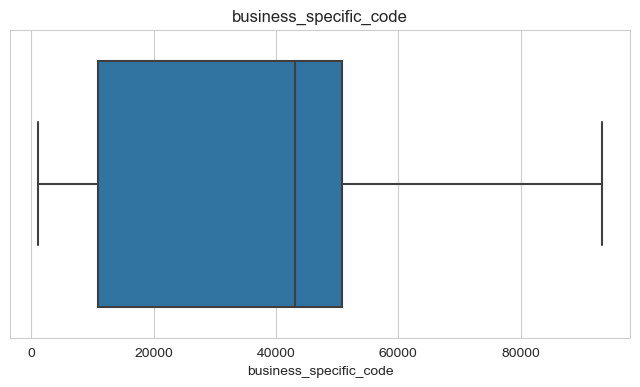

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


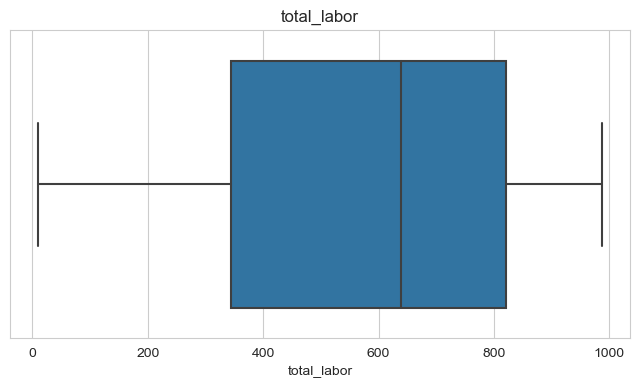

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


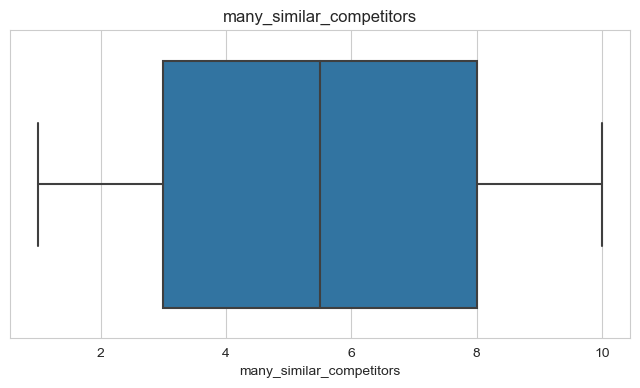

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


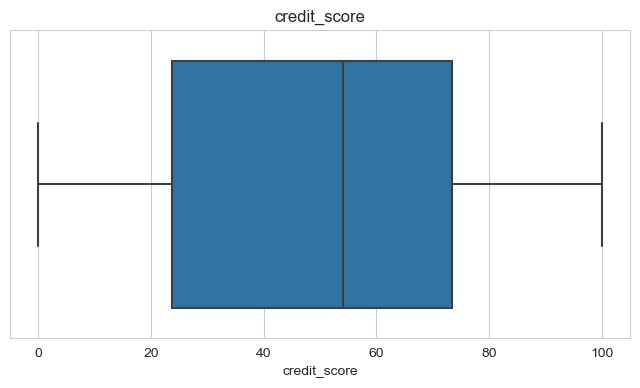

In [14]:
# boxplot for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.set_style('whitegrid')
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

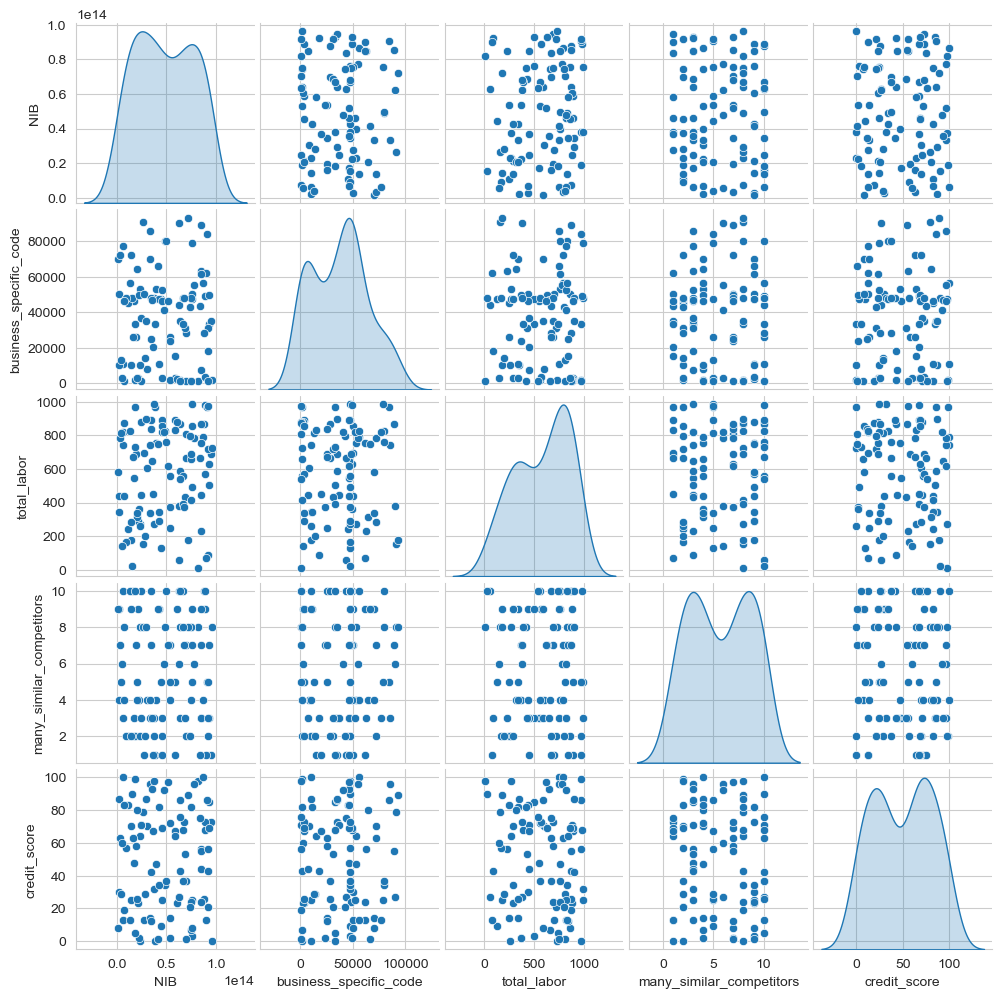

In [15]:
# pairplot
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.gcf().set_size_inches(10, 10)
plt.show()

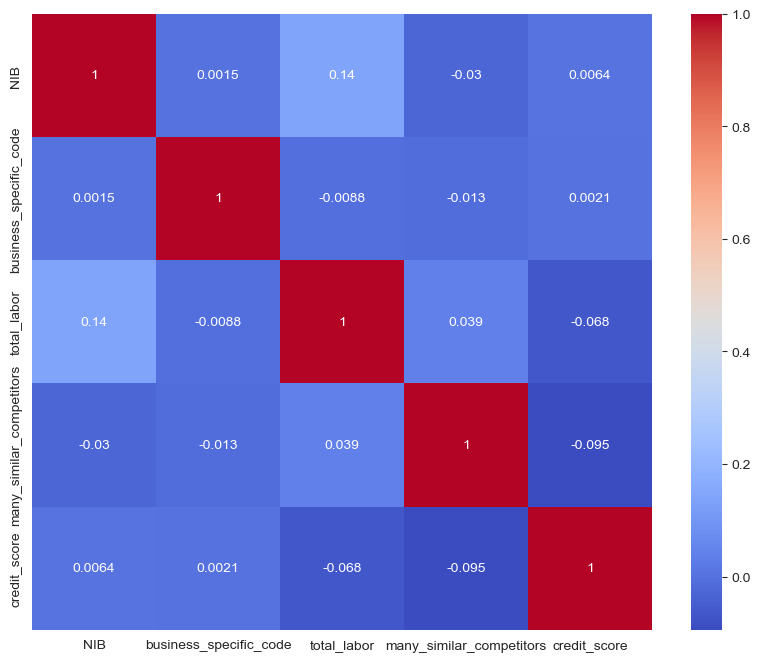

In [16]:
# melihat korelasi antar kolom
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
df_encoded = df.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder

# label encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,competitor_name,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score,credit_score_category
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,0,0,3,2,2,0,...,CV Hasanah,1,0,1,2,4,0,2,43,1
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,3,0,2,0,1,1,...,CV Yuniar,3,1,4,1,2,0,4,58,2
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,3,0,4,0,2,1,...,PT Mahendra,2,2,1,4,2,1,4,67,2
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,1,0,0,3,0,4,...,CV Hasanah Marpaung,0,2,1,4,3,2,2,48,1
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,3,2,4,3,3,1,...,CV Nasyiah,3,2,3,0,2,2,0,14,3


In [19]:
df.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,competitor_name,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score,credit_score_category
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,10-15 years,high,sedang,sangat kuat,sangat mudah,cukup mudah,...,CV Hasanah,harga lebih murah,agresif,diragukan,lancar,tidak lancar,dalam perhatian khusus,lancar,43,Fair
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,> 15 years,high,sangat mudah,cukup kuat,cukup sulit,cukup sulit,...,CV Yuniar,kualitas produk lebih baik,inovatif,tidak lancar,diragukan,lancar,dalam perhatian khusus,tidak lancar,58,Good
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,> 15 years,high,sulit,cukup kuat,sangat mudah,cukup sulit,...,PT Mahendra,jangkauan pasar yang luas,konservatif,diragukan,tidak lancar,lancar,diragukan,tidak lancar,67,Good
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,5-10 years,high,cukup mudah,tidak kuat,cukup mudah,sulit,...,CV Hasanah Marpaung,brand recognition yang kuat,konservatif,diragukan,tidak lancar,macet,lancar,lancar,48,Fair
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,> 15 years,medium,sulit,tidak kuat,sedang,cukup sulit,...,CV Nasyiah,kualitas produk lebih baik,konservatif,macet,dalam perhatian khusus,lancar,lancar,dalam perhatian khusus,14,Poor


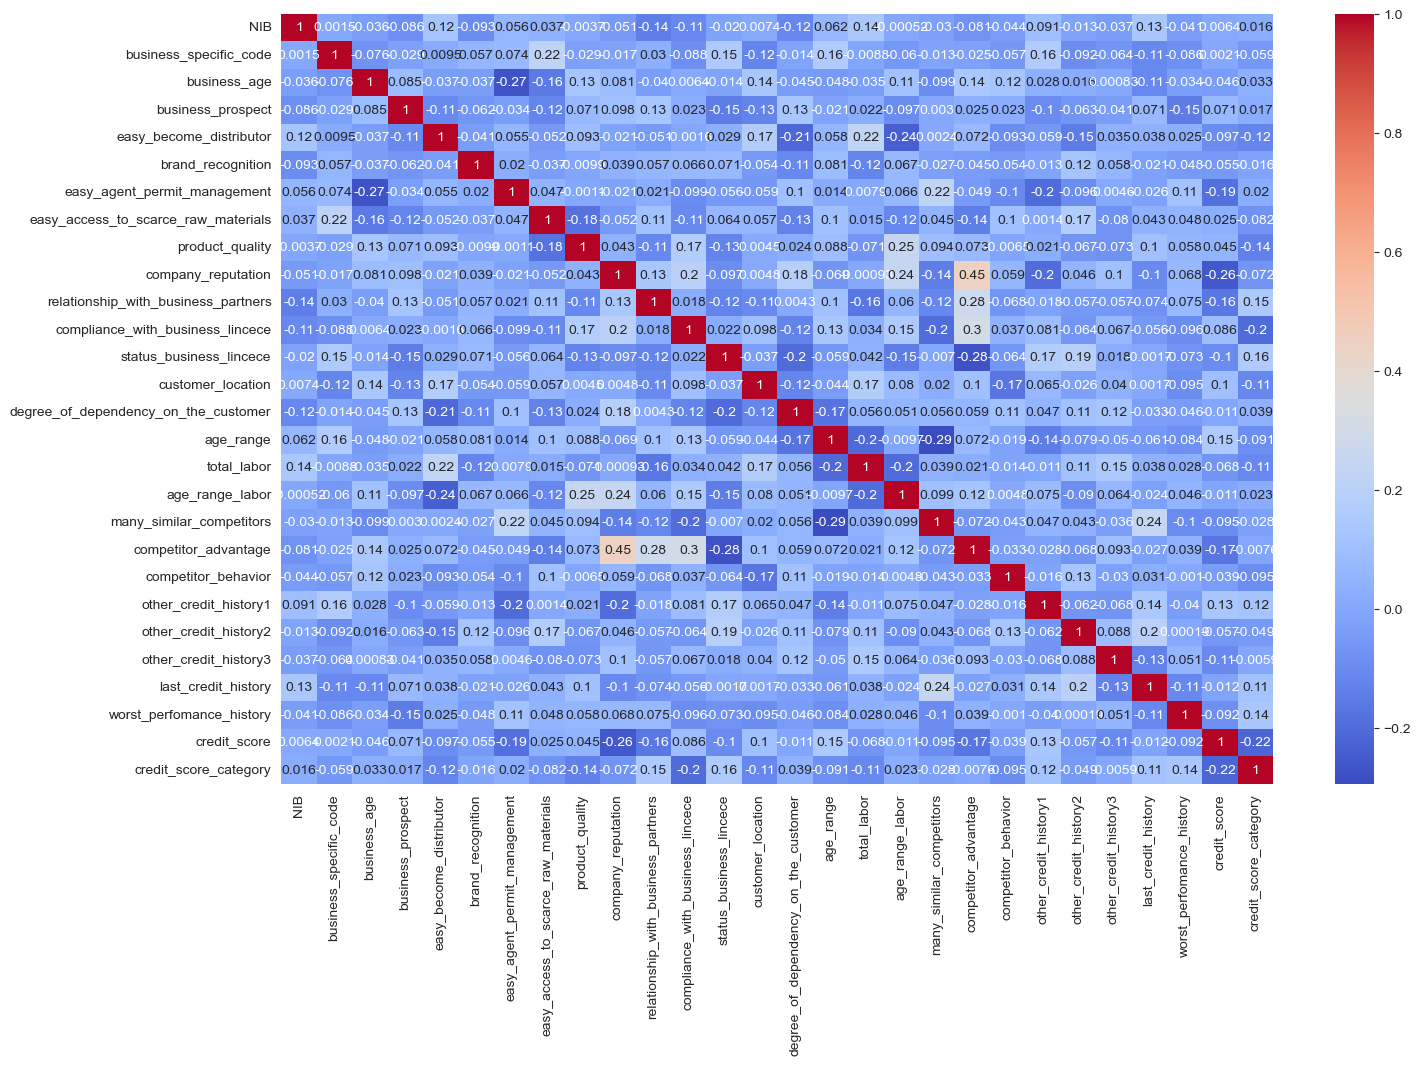

In [20]:
# korelasi antar kolom setelah label encoding
plt.figure(figsize=(16, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
df.corr()

,NIB,business_specific_code,total_labor,many_similar_competitors,credit_score
NIB,1.000000,0.001455,0.143250,-0.030137,0.006352
business_specific_code,0.001455,1.000000,-0.008796,-0.012623,0.002070
total_labor,0.143250,-0.008796,1.000000,0.039036,-0.067614
many_similar_competitors,-0.030137,-0.012623,0.039036,1.000000,-0.094851
credit_score,0.006352,0.002070,-0.067614,-0.094851,1.000000


In [22]:
df_encoded.corr()

,NIB,business_specific_code,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,product_quality,company_reputation,...,many_similar_competitors,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score,credit_score_category
NIB,1.000000,0.001455,-0.035905,-0.085808,0.123726,-0.093244,0.055606,0.037103,-0.003688,-0.050580,...,-0.030137,-0.080566,-0.044200,0.091258,-0.012754,-0.036905,0.130648,-0.040709,0.006352,0.016296
business_specific_code,0.001455,1.000000,-0.075897,-0.029364,0.009515,0.056931,0.073977,0.219733,-0.029202,-0.016587,...,-0.012623,-0.024894,-0.056826,0.161878,-0.092267,-0.063781,-0.111116,-0.085685,0.002070,-0.059074
business_age,-0.035905,-0.075897,1.000000,0.084588,-0.037342,-0.036821,-0.273869,-0.156369,0.129932,0.081231,...,-0.098742,0.140632,0.124391,0.028202,0.015549,0.000829,-0.112007,-0.033750,-0.045849,0.032607
business_prospect,-0.085808,-0.029364,0.084588,1.000000,-0.106750,-0.062309,-0.033925,-0.121196,0.071023,0.098327,...,0.002965,0.025042,0.022932,-0.101331,-0.062581,-0.041035,0.071497,-0.152048,0.070859,0.017497
easy_become_distributor,0.123726,0.009515,-0.037342,-0.106750,1.000000,-0.040818,0.055060,-0.051965,0.093240,-0.020927,...,0.002361,0.071510,-0.092938,-0.058919,-0.149230,0.035398,0.038326,0.025018,-0.096722,-0.120228
brand_recognition,-0.093244,0.056931,-0.036821,-0.062309,-0.040818,1.000000,0.020179,-0.037297,-0.009899,0.038892,...,-0.027316,-0.044910,-0.053569,-0.013124,0.123608,0.057510,-0.021414,-0.048292,-0.055126,-0.016262
easy_agent_permit_management,0.055606,0.073977,-0.273869,-0.033925,0.055060,0.020179,1.000000,0.047450,-0.001113,-0.020954,...,0.223425,-0.049099,-0.103119,-0.199460,-0.095508,0.004578,-0.026299,0.113455,-0.186028,0.019507
easy_access_to_scarce_raw_materials,0.037103,0.219733,-0.156369,-0.121196,-0.051965,-0.037297,0.047450,1.000000,-0.179469,-0.052150,...,0.045495,-0.142448,0.101507,0.001398,0.167291,-0.080070,0.043025,0.047509,0.025001,-0.082039
product_quality,-0.003688,-0.029202,0.129932,0.071023,0.093240,-0.009899,-0.001113,-0.179469,1.000000,0.042504,...,0.093508,0.072840,-0.006483,0.020795,-0.067227,-0.072928,0.100099,0.058034,0.044963,-0.135407
company_reputation,-0.050580,-0.016587,0.081231,0.098327,-0.020927,0.038892,-0.020954,-0.052150,0.042504,1.000000,...,-0.139922,0.447932,0.058874,-0.195328,0.046303,0.100392,-0.102468,0.068247,-0.255875,-0.071772


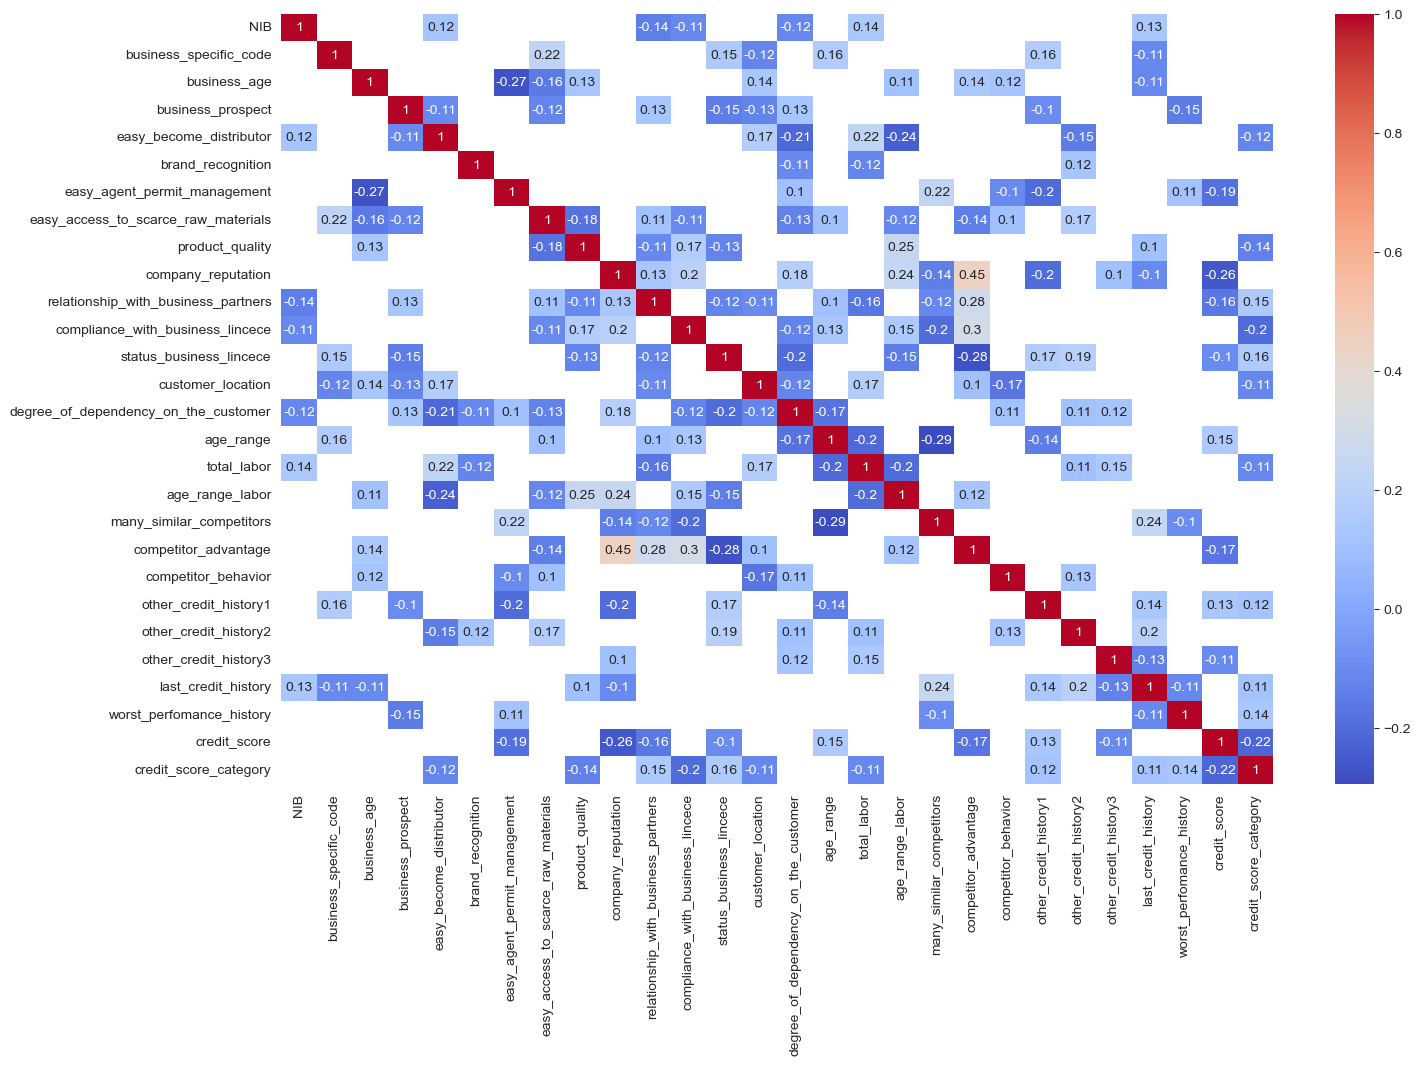

In [23]:
# get variable with high correlation
high_corr = df_encoded.corr()[abs(df_encoded.corr()) > 0.1]
plt.figure(figsize=(16, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.show()

## C. Data Preparation

In [24]:
# TODO: Salah milih fitur target
# * Harusnya kalau pake kolom credit_score pakainya regresi, karena nilainya kontinus :D
# target menggunakan kolom credit_score
df2 = df.copy()
df2 = df2.drop(['credit_score_category'], axis=1)

In [25]:
# pemilihan fitur numerical, nominal dan ordinal
numerical_feature = ["total_labor", "many_similar_competitors", "credit_score"]
nominal_feature = ["compliance_with_business_lincece","status_business_lincece", "customer_location","competitor_advantage", "competitor_behavior"]
ordinal_feature = ["other_credit_history1", "other_credit_history2", "other_credit_history3", "last_credit_history", "worst_perfomance_history","age_range_labor", "age_range", "degree_of_dependency_on_the_customer", "relationship_with_business_partners", "company_reputation", "product_quality", "easy_access_to_scarce_raw_materials", "easy_agent_permit_management", "brand_recognition", "easy_become_distributor", "business_prospect", "business_age" ]

#### Label Encoding (Ordinal Features)

In [26]:
other_credit_history1 = ['lancar', 'dalam perhatian khusus', 'tidak lancar', 'diragukan', 'macet']
other_credit_history2 = ['lancar', 'dalam perhatian khusus', 'tidak lancar', 'diragukan', 'macet']
other_credit_history3 = ['lancar', 'dalam perhatian khusus', 'tidak lancar', 'diragukan', 'macet']
last_credit_history = ['lancar', 'dalam perhatian khusus', 'tidak lancar', 'diragukan', 'macet']
worst_perfomance_history = ['lancar', 'dalam perhatian khusus', 'tidak lancar', 'diragukan', 'macet']
age_range_labor = ['21-35', '35-45', '> 45']
age_range = ['< 12', '12-18', '18-35', '33-55', '> 55']
degree_of_dependency_on_the_customer = ['tidak tergantung', 'kurang tergantung', 'cukup tergantung', 'sangat tergantung']
relationship_with_business_partners = ['tidak baik','cukup baik', 'baik', 'sangat baik']
company_reputation = ['tidak baik','cukup baik', 'baik', 'sangat baik']
product_quality = ['tidak baik','cukup baik', 'baik', 'sangat baik']
easy_access_to_scarce_raw_materials = ['sulit', 'cukup sulit', 'sedang', 'cukup mudah', 'sangat mudah']
easy_agent_permit_management = ['sulit', 'cukup sulit', 'sedang', 'cukup mudah', 'sangat mudah']
brand_recognition = ["tidak kuat", "cukup kuat", "kuat", "sangat kuat"]
easy_become_distributor = ['sulit', 'cukup sulit', 'sedang', 'cukup mudah', 'sangat mudah']
business_prospect = ['low', 'medium', 'high']
business_age = ['< 5 years', '5-10 years', '10-15 years', '> 15 years']

In [27]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[other_credit_history1, other_credit_history2, other_credit_history3, last_credit_history, worst_perfomance_history, age_range_labor, age_range, degree_of_dependency_on_the_customer, relationship_with_business_partners, company_reputation, product_quality, easy_access_to_scarce_raw_materials, easy_agent_permit_management, brand_recognition, easy_become_distributor, business_prospect, business_age])

df_encoded = df2.copy()
df_encoded[ordinal_feature] = oe.fit_transform(df_encoded[ordinal_feature])
df_encoded.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,many_similar_competitors,competitor_name,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,2.0,2.0,2.0,3.0,4.0,3.0,...,8,CV Hasanah,harga lebih murah,agresif,3.0,0.0,2.0,1.0,0.0,43
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,3.0,2.0,4.0,1.0,1.0,1.0,...,7,CV Yuniar,kualitas produk lebih baik,inovatif,2.0,3.0,0.0,1.0,2.0,58
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,3.0,2.0,0.0,1.0,4.0,1.0,...,5,PT Mahendra,jangkauan pasar yang luas,konservatif,3.0,2.0,0.0,3.0,2.0,67
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,1.0,2.0,3.0,0.0,3.0,0.0,...,3,CV Hasanah Marpaung,brand recognition yang kuat,konservatif,3.0,2.0,4.0,0.0,0.0,48
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,3.0,1.0,0.0,0.0,2.0,1.0,...,5,CV Nasyiah,kualitas produk lebih baik,konservatif,4.0,1.0,0.0,0.0,1.0,14


#### One Hot Encoding (Nominal Features)

In [28]:
df_one_encoded = pd.get_dummies(df_encoded, columns=nominal_feature, drop_first=True)
df_one_encoded.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,credit_score,compliance_with_business_lincece_tidak sesuai,status_business_lincece_tidak aktif,customer_location_luar negeri,competitor_advantage_harga lebih murah,competitor_advantage_jangkauan pasar yang luas,competitor_advantage_kualitas produk lebih baik,competitor_behavior_inovatif,competitor_behavior_konservatif,competitor_behavior_reaktif
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,2.0,2.0,2.0,3.0,4.0,3.0,...,43,0,0,1,1,0,0,0,0,0
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,3.0,2.0,4.0,1.0,1.0,1.0,...,58,1,1,1,0,0,1,1,0,0
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,3.0,2.0,0.0,1.0,4.0,1.0,...,67,0,1,1,0,1,0,0,1,0
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,1.0,2.0,3.0,0.0,3.0,0.0,...,48,0,0,1,0,0,0,0,1,0
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,3.0,1.0,0.0,0.0,2.0,1.0,...,14,1,0,1,0,0,1,0,1,0


#### Feature Engineering : Transformation (Numerical Features)

In [29]:
# transformasi data menggunakan metode logaritma
df_one_encoded[numerical_feature] = np.log(df_one_encoded[numerical_feature] + 1)
df_one_encoded.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,credit_score,compliance_with_business_lincece_tidak sesuai,status_business_lincece_tidak aktif,customer_location_luar negeri,competitor_advantage_harga lebih murah,competitor_advantage_jangkauan pasar yang luas,competitor_advantage_kualitas produk lebih baik,competitor_behavior_inovatif,competitor_behavior_konservatif,competitor_behavior_reaktif
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,2.0,2.0,2.0,3.0,4.0,3.0,...,3.784190,0,0,1,1,0,0,0,0,0
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,3.0,2.0,4.0,1.0,1.0,1.0,...,4.077537,1,1,1,0,0,1,1,0,0
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,3.0,2.0,0.0,1.0,4.0,1.0,...,4.219508,0,1,1,0,1,0,0,1,0
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,1.0,2.0,3.0,0.0,3.0,0.0,...,3.891820,0,0,1,0,0,0,0,1,0
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,3.0,1.0,0.0,0.0,2.0,1.0,...,2.708050,1,0,1,0,0,1,0,1,0


#### Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_one_encoded[numerical_cols] = sc.fit_transform(df_one_encoded[numerical_cols])
df_one_encoded.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,credit_score,compliance_with_business_lincece_tidak sesuai,status_business_lincece_tidak aktif,customer_location_luar negeri,competitor_advantage_harga lebih murah,competitor_advantage_jangkauan pasar yang luas,competitor_advantage_kualitas produk lebih baik,competitor_behavior_inovatif,competitor_behavior_konservatif,competitor_behavior_reaktif
0,0.546150,UD Irawan,-1.362898,Pengusahaan Hutan Alkasia,2.0,2.0,2.0,3.0,4.0,3.0,...,0.211340,0,0,1,1,0,0,0,0,0
1,-1.000003,CV Adriansyah Fujiati,-0.446643,Industri Barang Dari Kawat,3.0,2.0,4.0,1.0,1.0,1.0,...,0.476301,1,1,1,0,0,1,1,0,0
2,0.359659,UD Halimah Firgantoro Tbk,-1.320341,Pembesaran Ikan Air Tawar Di Sawah,3.0,2.0,0.0,1.0,4.0,1.0,...,0.604532,0,1,1,0,1,0,0,1,0
3,-1.075927,UD Melani Firmansyah (Persero) Tbk,0.343249,Perdagangan Besar Alat Permainan Dan Mainan An...,1.0,2.0,3.0,0.0,3.0,0.0,...,0.308556,0,0,1,0,0,0,0,1,0
4,0.184118,UD Budiman,-0.447335,Industri Alat Potong Dan Perkakas Tangan Yang ...,3.0,1.0,0.0,0.0,2.0,1.0,...,-0.760660,1,0,1,0,0,1,0,1,0


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
log_transform = FunctionTransformer(np.log1p)

numerical_transformer = Pipeline(steps=[
    ('log_transform', log_transform),
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[other_credit_history1, other_credit_history2, other_credit_history3, last_credit_history, worst_perfomance_history, age_range_labor, age_range, degree_of_dependency_on_the_customer, relationship_with_business_partners, company_reputation, product_quality, easy_access_to_scarce_raw_materials, easy_agent_permit_management, brand_recognition, easy_become_distributor, business_prospect, business_age])),
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# combine numerical and categorical transformer to column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_feature),
        ('ord', ordinal_transformer, ordinal_feature),
        ('nom', nominal_transformer, nominal_feature),
    ])

In [33]:
df2.head()

,NIB,business_name,business_specific_code,business_specific,business_age,business_prospect,easy_become_distributor,brand_recognition,easy_agent_permit_management,easy_access_to_scarce_raw_materials,...,many_similar_competitors,competitor_name,competitor_advantage,competitor_behavior,other_credit_history1,other_credit_history2,other_credit_history3,last_credit_history,worst_perfomance_history,credit_score
0,64106885502258,UD Irawan,2117,Pengusahaan Hutan Alkasia,10-15 years,high,sedang,sangat kuat,sangat mudah,cukup mudah,...,8,CV Hasanah,harga lebih murah,agresif,diragukan,lancar,tidak lancar,dalam perhatian khusus,lancar,43
1,19610571012204,CV Adriansyah Fujiati,25951,Industri Barang Dari Kawat,> 15 years,high,sangat mudah,cukup kuat,cukup sulit,cukup sulit,...,7,CV Yuniar,kualitas produk lebih baik,inovatif,tidak lancar,diragukan,lancar,dalam perhatian khusus,tidak lancar,58
2,58739895068689,UD Halimah Firgantoro Tbk,3224,Pembesaran Ikan Air Tawar Di Sawah,> 15 years,high,sulit,cukup kuat,sangat mudah,cukup sulit,...,5,PT Mahendra,jangkauan pasar yang luas,konservatif,diragukan,tidak lancar,lancar,diragukan,tidak lancar,67
3,17425586176950,UD Melani Firmansyah (Persero) Tbk,46498,Perdagangan Besar Alat Permainan Dan Mainan An...,5-10 years,high,cukup mudah,tidak kuat,cukup mudah,sulit,...,3,CV Hasanah Marpaung,brand recognition yang kuat,konservatif,diragukan,tidak lancar,macet,lancar,lancar,48
4,53688047387228,UD Budiman,25933,Industri Alat Potong Dan Perkakas Tangan Yang ...,> 15 years,medium,sulit,tidak kuat,sedang,cukup sulit,...,5,CV Nasyiah,kualitas produk lebih baik,konservatif,macet,dalam perhatian khusus,lancar,lancar,dalam perhatian khusus,14


In [34]:
def get_preprocessed_data(df):
    preprocessed_data = preprocessor.fit_transform(df)
    cat_feature_names = list(preprocessor.named_transformers_['nom'].named_steps['onehot'].get_feature_names_out(nominal_feature))
    feature_names = numerical_feature + ordinal_feature + cat_feature_names
    preprocessed_df = pd.DataFrame(preprocessed_data, columns=feature_names)
    return preprocessed_df

preprocessed_df = get_preprocessed_data(df2)


#### Splitting Data

In [35]:
X = preprocessed_df
y = df2['credit_score']
# y = df2['credit_score_category']

In [36]:
#import beberapa library yang dibutuhkan
import sklearn
from sklearn.model_selection import train_test_split

#membagi dataset menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### D. Modelling 

In [37]:
# import library yang dibutuhkan
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

#### 1. Regression

In [39]:
# mencoba model regresi
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models_reg, predictions_reg = reg.fit(X_train, X_test, y_train, y_test)
models_reg.sort_values(by='R-Squared', ascending=False)

100%|██████████| 42/42 [00:02<00:00, 15.24it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,1.00,1.00,0.97,0.13
AdaBoostRegressor,1.00,1.00,1.21,0.16
RandomForestRegressor,1.00,1.00,1.24,0.31
ExtraTreesRegressor,1.00,1.00,1.25,0.22
XGBRegressor,1.00,1.00,1.29,0.10
DecisionTreeRegressor,1.01,1.00,1.87,0.02
BaggingRegressor,1.01,1.00,1.89,0.05
PoissonRegressor,1.03,0.99,3.79,0.03
HistGradientBoostingRegressor,1.04,0.98,4.71,0.22


### GradientBoostingRegressor

In [44]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

# menampilkan hasil prediksi
score_train_gbr = gbr.score(X_train, y_train)
score_test_gbr = gbr.score(X_test, y_test)
rmse_gbr = sqrt(mean_squared_error(y_test, y_pred_gbr))
print("Score Train:", score_train_gbr)
print("Score Test:", score_test_gbr)
print("RMSE:", rmse_gbr)

Score Train: 0.9999998622527974
Score Test: 0.9990810715124107
RMSE: 0.9749043775821077


### AdaBoostRegressor

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

abr = AdaBoostRegressor()
abr.fit(X_train, y_train)

y_pred_abr = abr.predict(X_test)

# menampilkan hasil prediksi
score_train_abr = abr.score(X_train, y_train)
score_test_abr = abr.score(X_test, y_test)
rmse_abr = sqrt(mean_squared_error(y_test, y_pred_abr))
print("Score Train:", score_train_abr)
print("Score Test:", score_test_abr)
print("RMSE:", rmse_abr)


# generate some random regression data
#X, y = make_regression(n_samples=1000, n_features=10, random_state=42)

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a decision tree regressor as the base estimator
#base_estimator = DecisionTreeRegressor(max_depth=3)

# create an AdaBoost regressor with 100 estimators
#ada = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# fit the AdaBoost regressor to the training data
#ada.fit(X_train, y_train)

# make predictions on the testing data
#y_pred = ada.predict(X_test)

# evaluate the performance of the model using mean squared error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean squared error: {:.2f}".format(mse))

Score Train: 0.9896235321804981
Score Test: 0.9935573664160915
RMSE: 2.581385575519619


### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import pandas as pd


rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

y_pred_rfg = rfg.predict(X_test)

# menampilkan hasil prediksi
score_train_rfg = rfg.score(X_train, y_train)
score_test_rfg = rfg.score(X_test, y_test)
rmse_rfg = sqrt(mean_squared_error(y_test, y_pred_rfg))
print("Score Train:", score_train_rfg)
print("Score Test:", score_test_rfg)
print("RMSE:", rmse_rfg)

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
#rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
#rf.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = rf.predict(X_test)

# Evaluate the model's performance
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print("MSE: ", mse)
#print("R2 score: ", r2)

Score Train: 0.9996304583969884
Score Test: 0.9978074331183711
RMSE: 1.5059050434871382


### Extra Trees Regressor

In [47]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

y_pred_etr = etr.predict(X_test)

# menampilkan hasil prediksi
score_train_etr = etr.score(X_train, y_train)
score_test_etr = etr.score(X_test, y_test)
rmse_etr = sqrt(mean_squared_error(y_test, y_pred_etr))
print("Score Train:", score_train_etr)
print("Score Test:", score_test_etr)
print("RMSE:", rmse_etr)


# load the data
#data = pd.read_excel('dataini.xlsx')

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the Extra Trees Regressor model
#model = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42)

# fit the model on the training data
#model.fit(X_train, y_train)

# make predictions on the test data
#y_pred = model.predict(X_test)

# calculate mean squared error on the test data
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

Score Train: 1.0
Score Test: 0.9973095553471464
RMSE: 1.6681426797489471


### XGB Boost Regressor

In [48]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


XGBbr = xgb.XGBRegressor()
XGBbr.fit(X_train, y_train)

y_pred_XGBbr = XGBbr.predict(X_test)

# menampilkan hasil prediksi
score_train_XGBbr = XGBbr.score(X_train, y_train)
score_test_XGBbr = XGBbr.score(X_test, y_test)
rmse_XGBbr = sqrt(mean_squared_error(y_test, y_pred_XGBbr))
print("Score Train:", score_train_XGBbr)
print("Score Test:", score_test_XGBbr)
print("RMSE:", rmse_XGBbr)

# load the data
#data = pd.read_excel('dataini.xlsx')

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
#xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             #n_estimators=100, 
                             #max_depth=5, 
                             #learning_rate=0.1)

# Train the model
#xgb_model.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = xgb_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred)
#print("MSE: %.2f" % mse)

Score Train: 0.9999999995436166
Score Test: 0.9983965728426739
RMSE: 1.2877921705581274


## E. Evaluation

In [49]:
# perbandingan hasil prediksi
acc = pd.DataFrame({
    'Model': ['GradientBoostingRegressor', 'AdaBoostRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor', 'xgb.XGBRegressor'],
    'R2 Score Train': [score_train_gbr, score_train_abr, score_train_rfg, score_train_etr, score_train_XGBbr],
    'R2 Score Test': [score_test_gbr, score_test_abr, score_test_rfg, score_test_etr, score_test_XGBbr],
    'RMSE': [rmse_gbr, rmse_abr, rmse_rfg, rmse_etr, rmse_XGBbr]
})
acc

,Model,R2 Score Train,R2 Score Test,RMSE
0,GradientBoostingRegressor,1.00,1.00,0.97
1,AdaBoostRegressor,0.99,0.99,2.58
2,RandomForestRegressor,1.00,1.00,1.51
3,ExtraTreesRegressor,1.00,1.00,1.67
4,xgb.XGBRegressor,1.00,1.00,1.29


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# membuat model ExtraTreesRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# melakukan cross validation dengan 10-fold
scores_train = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2')
scores_test = cross_val_score(gbr, X_test, y_test, cv=10, scoring='r2')

# menampilkan nilai rata-rata cross validation pada data train dan test
print("Rata-rata CV score pada data train:", scores_train.mean())
print("Rata-rata CV score pada data test:", scores_test.mean())

# menampilkan perbandingan antara nilai rata-rata cross validation pada data train dan test
print("Perbandingan rata-rata CV score pada data train dan test:", scores_train.mean() / scores_test.mean())

Rata-rata CV score pada data train: 0.9984538452510014
Rata-rata CV score pada data test: -12.625115729300443
Perbandingan rata-rata CV score pada data train dan test: -0.07908472814500891


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# buat model GradientBoostingRegressor
gb = GradientBoostingRegressor()

# lakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(gb, X_train, y_train, cv=5)

# tampilkan nilai rata-rata cross-validation score
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))

Mean cross-validation score: 1.00


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor

# buat model GradientBoostingRegressor
adr = AdaBoostRegressor()

# lakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(gb, X_train, y_train, cv=5)

# tampilkan nilai rata-rata cross-validation score
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))

Mean cross-validation score: 1.00


In [53]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge regression model with different regularization strengths
alpha_values = [0.01, 0.1, 1, 10]
train_scores = []
val_scores = []
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    train_scores.append(mean_squared_error(y_train, model.predict(X_train)))
    val_scores.append(mean_squared_error(y_val, model.predict(X_val)))

# Compare the training and validation scores for different regularization strengths
print("Training Scores:", train_scores)
print("Validation Scores:", val_scores)

# Choose the regularization strength that gives the best validation score
best_alpha = alpha_values[val_scores.index(min(val_scores))]
print("Best Alpha:", best_alpha)

# Train a final model with the best regularization strength and evaluate its performance on the test set
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
test_score = mean_squared_error(y_test, model.predict(X_test))
print("Test Score:", test_score)

Training Scores: [147.54205609742786, 147.55452668418826, 148.28052326925294, 161.98549794006655]
Validation Scores: [460.9099201240886, 460.51171824688197, 457.89394053260173, 462.01163911593824]
Best Alpha: 1
Test Score: 457.89394053260173


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Split dataset into features and target
X = preprocessed_df
y = df2['credit_score']

# Define number of folds for cross validation
n_folds = 5

# Initialize KFold object
kf = KFold(n_splits=n_folds, shuffle=True)

# Initialize model
model = LinearRegression()

# Create empty dataframe to store results
results_df = pd.DataFrame()

# Loop over each fold and fit the model
for i, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    mse = np.mean((y_val - y_pred) ** 2)

    # Store results in dataframe
    fold_result = pd.DataFrame({'Fold': [i+1], 'MSE': [mse]})
    results_df = pd.concat([results_df, fold_result], ignore_index=True)

# Print overall cross validation results
print('Cross validation results:')
print(results_df)

# Calculate mean MSE across all folds
mean_mse = results_df['MSE'].mean()

print('Mean MSE:', mean_mse)

Cross validation results:
   Fold    MSE
0     1 459.35
1     2 341.19
2     3 264.72
3     4 401.88
4     5 508.25
Mean MSE: 395.0803914148267


### Save Model

In [55]:
import joblib

joblib.dump(gbr, 'gbr.pkl')
joblib.dump(abr, 'abr.pkl')
joblib.dump(rfg, 'rfg.pkl')
joblib.dump(etr, 'etr.pkl')
joblib.dump(XGBbr, 'XGBbr.pkl')

['XGBbr.pkl']

### Test Saved Model

In [56]:
rfg_import = joblib.load('rfg.pkl')

In [57]:
rfg_import.predict(X_train)

array([57.49, 67.52, 48.16, 12.16, 47.15, 86.16, 86.46, 72.12, 86.4 ,
       72.62,  0.93,  1.99, 82.35, 97.15, 96.38, 23.78, 56.42, 27.02,
       23.56, 70.75, 21.62, 80.15,  9.93, 41.57,  0.5 , 34.41,  0.57,
        2.  , 62.85, 33.42,  9.61, 27.9 ,  1.92, 56.93, 42.82, 80.6 ,
       12.62, 53.96,  1.17, 83.17, 63.21, 33.87, 86.19,  9.07, 13.28,
       24.81, 12.39, 41.4 , 68.93, 36.41, 92.92, 74.68, 24.33, 82.2 ,
       89.6 , 70.9 , 29.58, 27.01, 26.63, 35.89, 12.56, 11.94, 28.88,
       68.42, 86.61, 25.41, 69.25, 59.27, 55.7 , 72.79, 96.95, 12.35,
        8.67, 75.91, 63.65, 24.23,  1.01, 21.93, 56.39, 67.27])

In [58]:
y_train

1     58
2     67
3     48
4     14
9     47
      ..
93    24
95     1
96    21
97    56
99    67
Name: credit_score, Length: 80, dtype: int64